In [1]:

# https://www.openml.org/search?type=data&sort=runs&id=216&satatus=active 
from datasets import load_dataset
elevators = load_dataset('inria-soda/tabular-benchmark', data_files='reg_num/elevators.csv')
elev = elevators['train'].to_pandas()
from sklearn.tree import DecisionTreeRegressor
X_elev = elev.drop(columns=['Goal'])
y_elev = elev['Goal']
dt_elev = DecisionTreeRegressor(max_depth=3)
dt_elev.fit(X_elev, y_elev)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_elev, y_elev, random_state=42)
test_scores = []
train_scores = []
for i in range(1, 20):
    dt = DecisionTreeRegressor(max_depth=i)
    dt.fit(X_train, y_train)
    test_scores.append(dt.score(X_test, y_test))
    train_scores.append(dt.score(X_train, y_train))

c:\Users\LiMat\Documents\Applied ML\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# create a random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=3)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.526987001117192

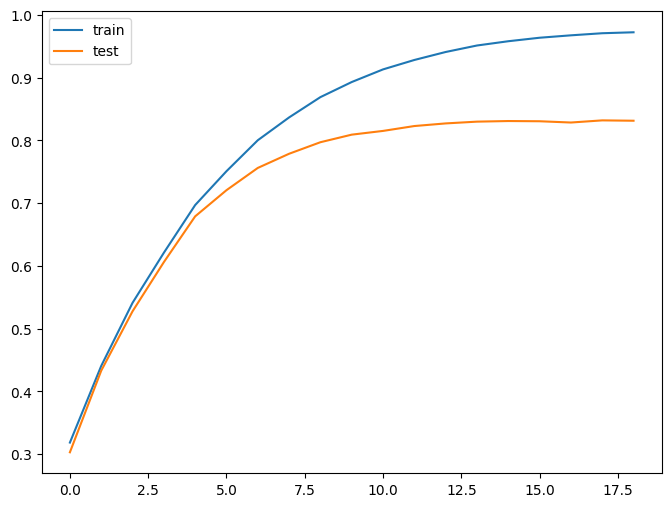

In [3]:
import pandas as pd

# sweep over depths and plot results
test_scores = []
train_scores = []
for i in range(1, 20):
    rf = RandomForestRegressor(n_estimators=100, max_depth=i)
    rf.fit(X_train, y_train)
    test_scores.append(rf.score(X_test, y_test))
    train_scores.append(rf.score(X_train, y_train))

ax = pd.DataFrame({'train': train_scores, 'test': test_scores}).plot.line(figsize=(8, 6))

In [4]:
# create a random forest regressor with depth 13
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=13, random_state=42)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8270018326681252

In [ ]:
# create an xgb regressor
# uses boosting : decision tree that correct decision tree's error
# bagging is when you take a lot of decision trees and average them
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

0.8764783616363858